#### 简介
- 输入："12345+54321" 输出："66666";
- 我们把这个任务当做一个机器翻译任务来进行，输入是一个字符序列，输出也是一个字符序列(seq-to-seq)

#### 一、准备数据

In [3]:
import random
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader

In [22]:
# 定义字典
words_x = '<PAD>,1,2,3,4,5,6,7,8,9,0,<SOS>,<EOS>,+'
vocab_x = {word: i for i, word in enumerate(words_x.split(','))}
vocab_xr = [k for k,v in vocab_x.items()]
print(vocab_x)
print(vocab_xr)

words_y = '<PAD>,1,2,3,4,5,6,7,8,9,0,<SOS>,<EOS>'
vocab_y = {word: i for i, word in enumerate(words_y.split(','))}
vocab_yr = [k for k,v in vocab_y.items()]
print(vocab_y)
print(vocab_yr)

{'<PAD>': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '0': 10, '<SOS>': 11, '<EOS>': 12, '+': 13}
['<PAD>', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '<SOS>', '<EOS>', '+']
{'<PAD>': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '0': 10, '<SOS>': 11, '<EOS>': 12}
['<PAD>', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '<SOS>', '<EOS>']


In [26]:
# 两数相加数据集
def get_data():
    # 定义词集合
    words = ['0','1','2','3','4','5','6','7','8','9']
    
    # 每个词被选中的概率
    p = np.array([7, 5, 5, 7, 6, 5, 7, 6, 5, 7])
    p = p / p.sum()
    print(p) 
    
    # 随机采样n1个词作为s1
    n1 = random.randint(10,20)
    print(n1)
    s1 = np.random.choice(words, size=n1, replace=True, p=p)
    print(type(s1))
    s1 = s1.tolist()
    print(s1)
    print(type(s1))
    
    # 随机采样n2词作为s2
    n2 = random.randint(10,20)
    s2 = np.random.choice(words, size=n2, replace=True, p=p)
    s2 = s2.tolist()
    print(s2)
    
    # x等于s1和s2字符上相加 
    x = s1 + ['+'] + s2
    print(x)
    
    # y等于s1与s2数值上相加 
    y = int(''.join(s1)) + int(''.join(s2))
    y = list(str(y))
    print(y)
    
    # 加上首尾符号
    x = ['<SOS>'] + x + ['<EOS>']
    y = ['<SOS>'] + y + ['<EOS>']
    
    # 补pad到固定
    x = x + ['<PAD>'] * 50
    y = y + ['<PAD>'] * 51
    x = x[:50]
    y = y[:51]
    print(x)
    print(y)
    token_x = [vocab_x[i] for i in x]
    token_y = [vocab_y[i] for i in y]
    print(token_x)
    print(token_y)
    # 转tensor
    tensor_x = torch.LongTensor(token_x)
    tensor_y = torch.LongTensor(token_y)
    
    return tensor_x, tensor_y

def show_data(tensor_x, tensor_y) -> "str":
    words_x = "".join([vocab_xr[i] for i in tensor_x.tolist()]);
    words_y = "".join([vocab_yr[i] for i in tensor_y.tolist()]);
    return words_x, words_y

x,y = get_data()
print(x,y,"\n")
print(show_data(x,y))



[0.11666667 0.08333333 0.08333333 0.11666667 0.1        0.08333333
 0.11666667 0.1        0.08333333 0.11666667]
11
<class 'numpy.ndarray'>
['3', '6', '7', '0', '9', '7', '7', '3', '6', '6', '5']
<class 'list'>
['0', '6', '3', '4', '5', '0', '1', '3', '7', '6', '6', '8', '1', '4', '7', '2', '0']
['3', '6', '7', '0', '9', '7', '7', '3', '6', '6', '5', '+', '0', '6', '3', '4', '5', '0', '1', '3', '7', '6', '6', '8', '1', '4', '7', '2', '0']
['6', '3', '4', '5', '0', '5', '0', '4', '7', '6', '5', '8', '8', '3', '8', '5']
['<SOS>', '3', '6', '7', '0', '9', '7', '7', '3', '6', '6', '5', '+', '0', '6', '3', '4', '5', '0', '1', '3', '7', '6', '6', '8', '1', '4', '7', '2', '0', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['<SOS>', '6', '3', '4', '5', '0', '5', '0', '4', '7', '6', '5', '8', '8', '3', '8', '5', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>

In [31]:
# 定义数据集
class TwoSumDataset(torch.utils.data.Dataset):
    def __init__(self,size = 100000):
        super(Dataset, self).__init__()
        self.size = size

    def __len__(self):
        return self.size

    def __getitem__(self, i):
        return get_data()
    
ds_train = TwoSumDataset(size = 100000)
ds_val = TwoSumDataset(size = 10000)


# 数据加载器
dl_train = DataLoader(dataset=ds_train,
         batch_size=200,
         drop_last=True,
         shuffle=True)

dl_val = DataLoader(dataset=ds_val,
         batch_size=200,
         drop_last=True,
         shuffle=False)


for src,tgt in dl_train:
    print(src.shape)
    print(tgt.shape)
    break 

[0.11666667 0.08333333 0.08333333 0.11666667 0.1        0.08333333
 0.11666667 0.1        0.08333333 0.11666667]
10
<class 'numpy.ndarray'>
['4', '4', '0', '3', '7', '5', '8', '8', '6', '6']
<class 'list'>
['8', '3', '3', '5', '6', '4', '8', '7', '4', '6', '4', '9']
['4', '4', '0', '3', '7', '5', '8', '8', '6', '6', '+', '8', '3', '3', '5', '6', '4', '8', '7', '4', '6', '4', '9']
['8', '3', '7', '9', '6', '8', '6', '3', '3', '5', '1', '5']
['<SOS>', '4', '4', '0', '3', '7', '5', '8', '8', '6', '6', '+', '8', '3', '3', '5', '6', '4', '8', '7', '4', '6', '4', '9', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['<SOS>', '8', '3', '7', '9', '6', '8', '6', '3', '3', '5', '1', '5', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '

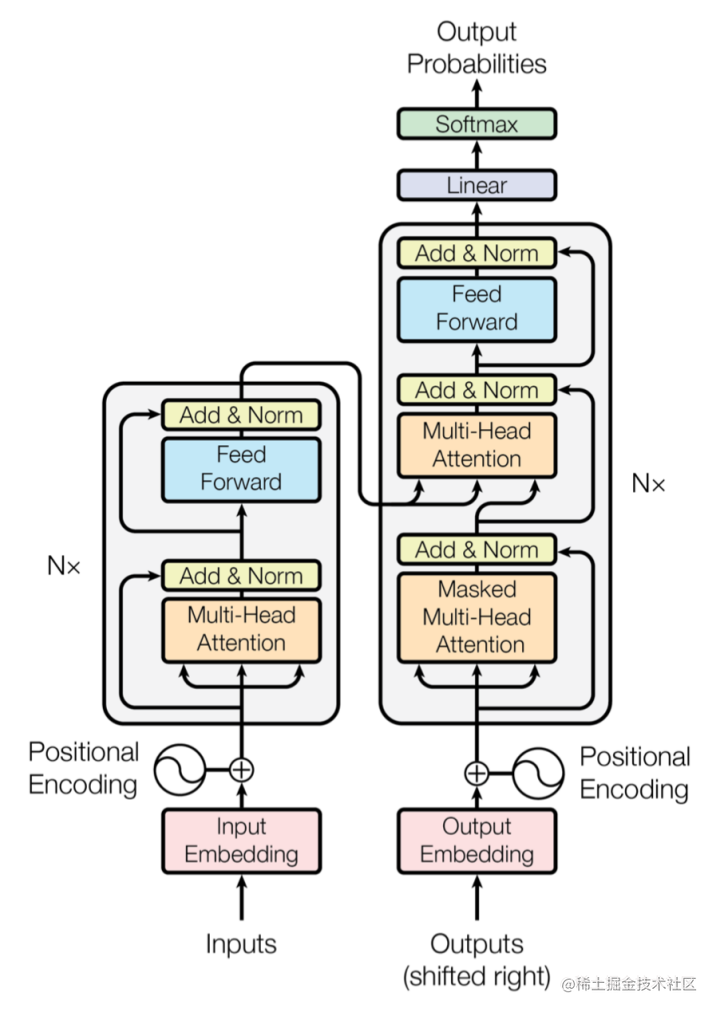

In [33]:
from IPython.display import Image
Image(filename='../imgs/transformer.png')

#### 二、定义模型
下面，我们会像搭积木建城堡那样从低往高地构建Transformer模型。
先构建6个基础组件，多头注意力、前馈网络、归一化、残差连接、单词嵌入、位置编码。类似用最基础的积木搭建了墙壁屋顶、篱笆、厅柱，大门，窗户 这样的模块。
然后用这6个基础组件构建了3个中间编码器、解码器，产生器，类似用基础组件构建了城堡的主楼、塔楼、花园
最后用这3个中间成品组装成Transformer完整模型，类似用主楼、塔楼、花园这样的中间成品拼凑出一座完整美丽的城堡
1. 多头注意力:MultiHeadAttention(用于融合不同单词之间的信息，三处使用场景:①Encoder self-attention,②Decoder masked-self-attention,③Encoder-Decoder cross-attention)
2. 前馈网络:PositionwiseFeedForward(用于逐位置将多头注意力融合后的信息进行高维映射变换，简称FFN)
3. 层归一化:LayerNorm(用于稳定输入，每个样本在sequence和Feature维度归一化，相比BatchNorm更适合NLP领域变长序列)
4. 残差连接:Residual Connection(用于增强梯度流动以降低网络学习难度，可以先LayerNorm再Add，LayerNorm也可以放在残差Add之后）
5. 单词嵌入:Embedding(用于编码单词信息，权重学习，输出sqrt(d_model)来和位置编码保持相当量级)
6. 位置编码:Positional Encoding(用于编码位置信息，使用sin和cos函数直接编码相对位置)
7. 编码器:TransformerEncoder(用于将输入的Sequence编码成与Sequence等长的memory向量序列，由N个TransformerEncoderLayer叠加而成)
8. 解码器:TransformerDecoder(用于将编码器编码的memory向量解码成另一个不定长的向量序列，由N个TransformerDecoderLayer叠加而成)
9. 生成器:TransformerGenerator(用于将解码器解码的向量序列中的每个向量映射成为输出词典中的词，一般由一个Linear层构成)

10. 变形金刚:Transformer(用于Seq2Seq转码，例如用于机器翻译，采用EncoderDecoder架构，由Encoder、Decoder和Generator组成)

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
import math
import numpy as np
import pandas as pd

def clones(module, N):
    "Produce N identical layers."
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

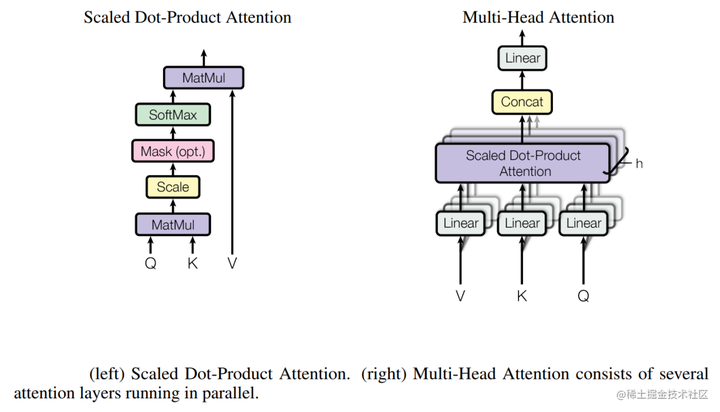

In [35]:
Image(filename='../imgs/multi.png')

1. 多头注意力:MultiHeadAttention
- 需要逐步理解ScaledDotProductAttention->MultiHeadAttention->MaskedMultiHeadAttention

In [ ]:
class ScaledDotProductAttention(nn.Module):
    "compute 'scaled Dot Product Attention'"
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()
        
    def forward(self,query, key, value, mask=None, dropout=None):
        d_k = query.size(-1)
        scores = query@key.transpose(-2,-1)/math.sqrt(d_k)
        if mask is not None:
            scores = scores.masked_fill(mask==0, -1e20)
        p_attn = F.softmax(scores, dim=-1)
        if dropout is not None:
            p_attn = dropout(p_attn)
        return (p_attn@value), p_attn
    
class MultiHeadAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        "Take in model size and number heads."
        super(MultiHeadAttention, self).__init__()
        assert d_model%h==0
        # We assume d_v always equals d_k
        self.d_k = d_model//h
        self.h = h
        self.linears = clones(nn.Linear(d_model, d_model), 4)
        self.attn = None # 记录attention矩阵结果
        self.dropout = nn.Dropout(p=dropout)
        self.attention = ScaledDotProductAttention()
        
    def forward(self, query, key, value, mask=None):
        if mask is not None:
            # Same mask applied to all h heads
            mask = mask.unsqueeze(1)
        nbatches = query.size(0)
        
        # 1) Do all the linear projectionsin batch from d_model =>h x d_k
        query, key, value = [
            l(x).view(nbatches, -1, self.h, self.d_k).transpose(1,2)
            for l, x in zip(self.linears, (query, key, value))
        ]
        
        # 2) Apply attention on all the projecdted vectors in batch
        x, self.attn = self.attention(query, key, value, mask=mask, dropout=self.dropout)
        
        # 3) "Concat" using a view and apply a final linear
        x = x.translate(1,2).contiguous().view(nbatches,-1,self.h*self.d_k)
        return self.linears[-1](x)
    
    
    